<a href="https://colab.research.google.com/github/ruthin1912/machinelearning/blob/main/20125_week_9_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('https://github.com/datasciencedojo/datasets/raw/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
# Putting feature variable to X
X = df.drop('Embarked',axis=1)
# Putting response variable to y
y = df['Embarked']

In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((623, 11), (268, 11))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

In [ ]:
# checking the model score
classifier_rf.score(X_test, y_test)

0.654320987654321

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# Creating a dictionary of parameteres with their values being in lists
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
# Imporing GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instantiating the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 4.04 s, sys: 147 ms, total: 4.18 s
Wall time: 1min 50s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.6985815602836879

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

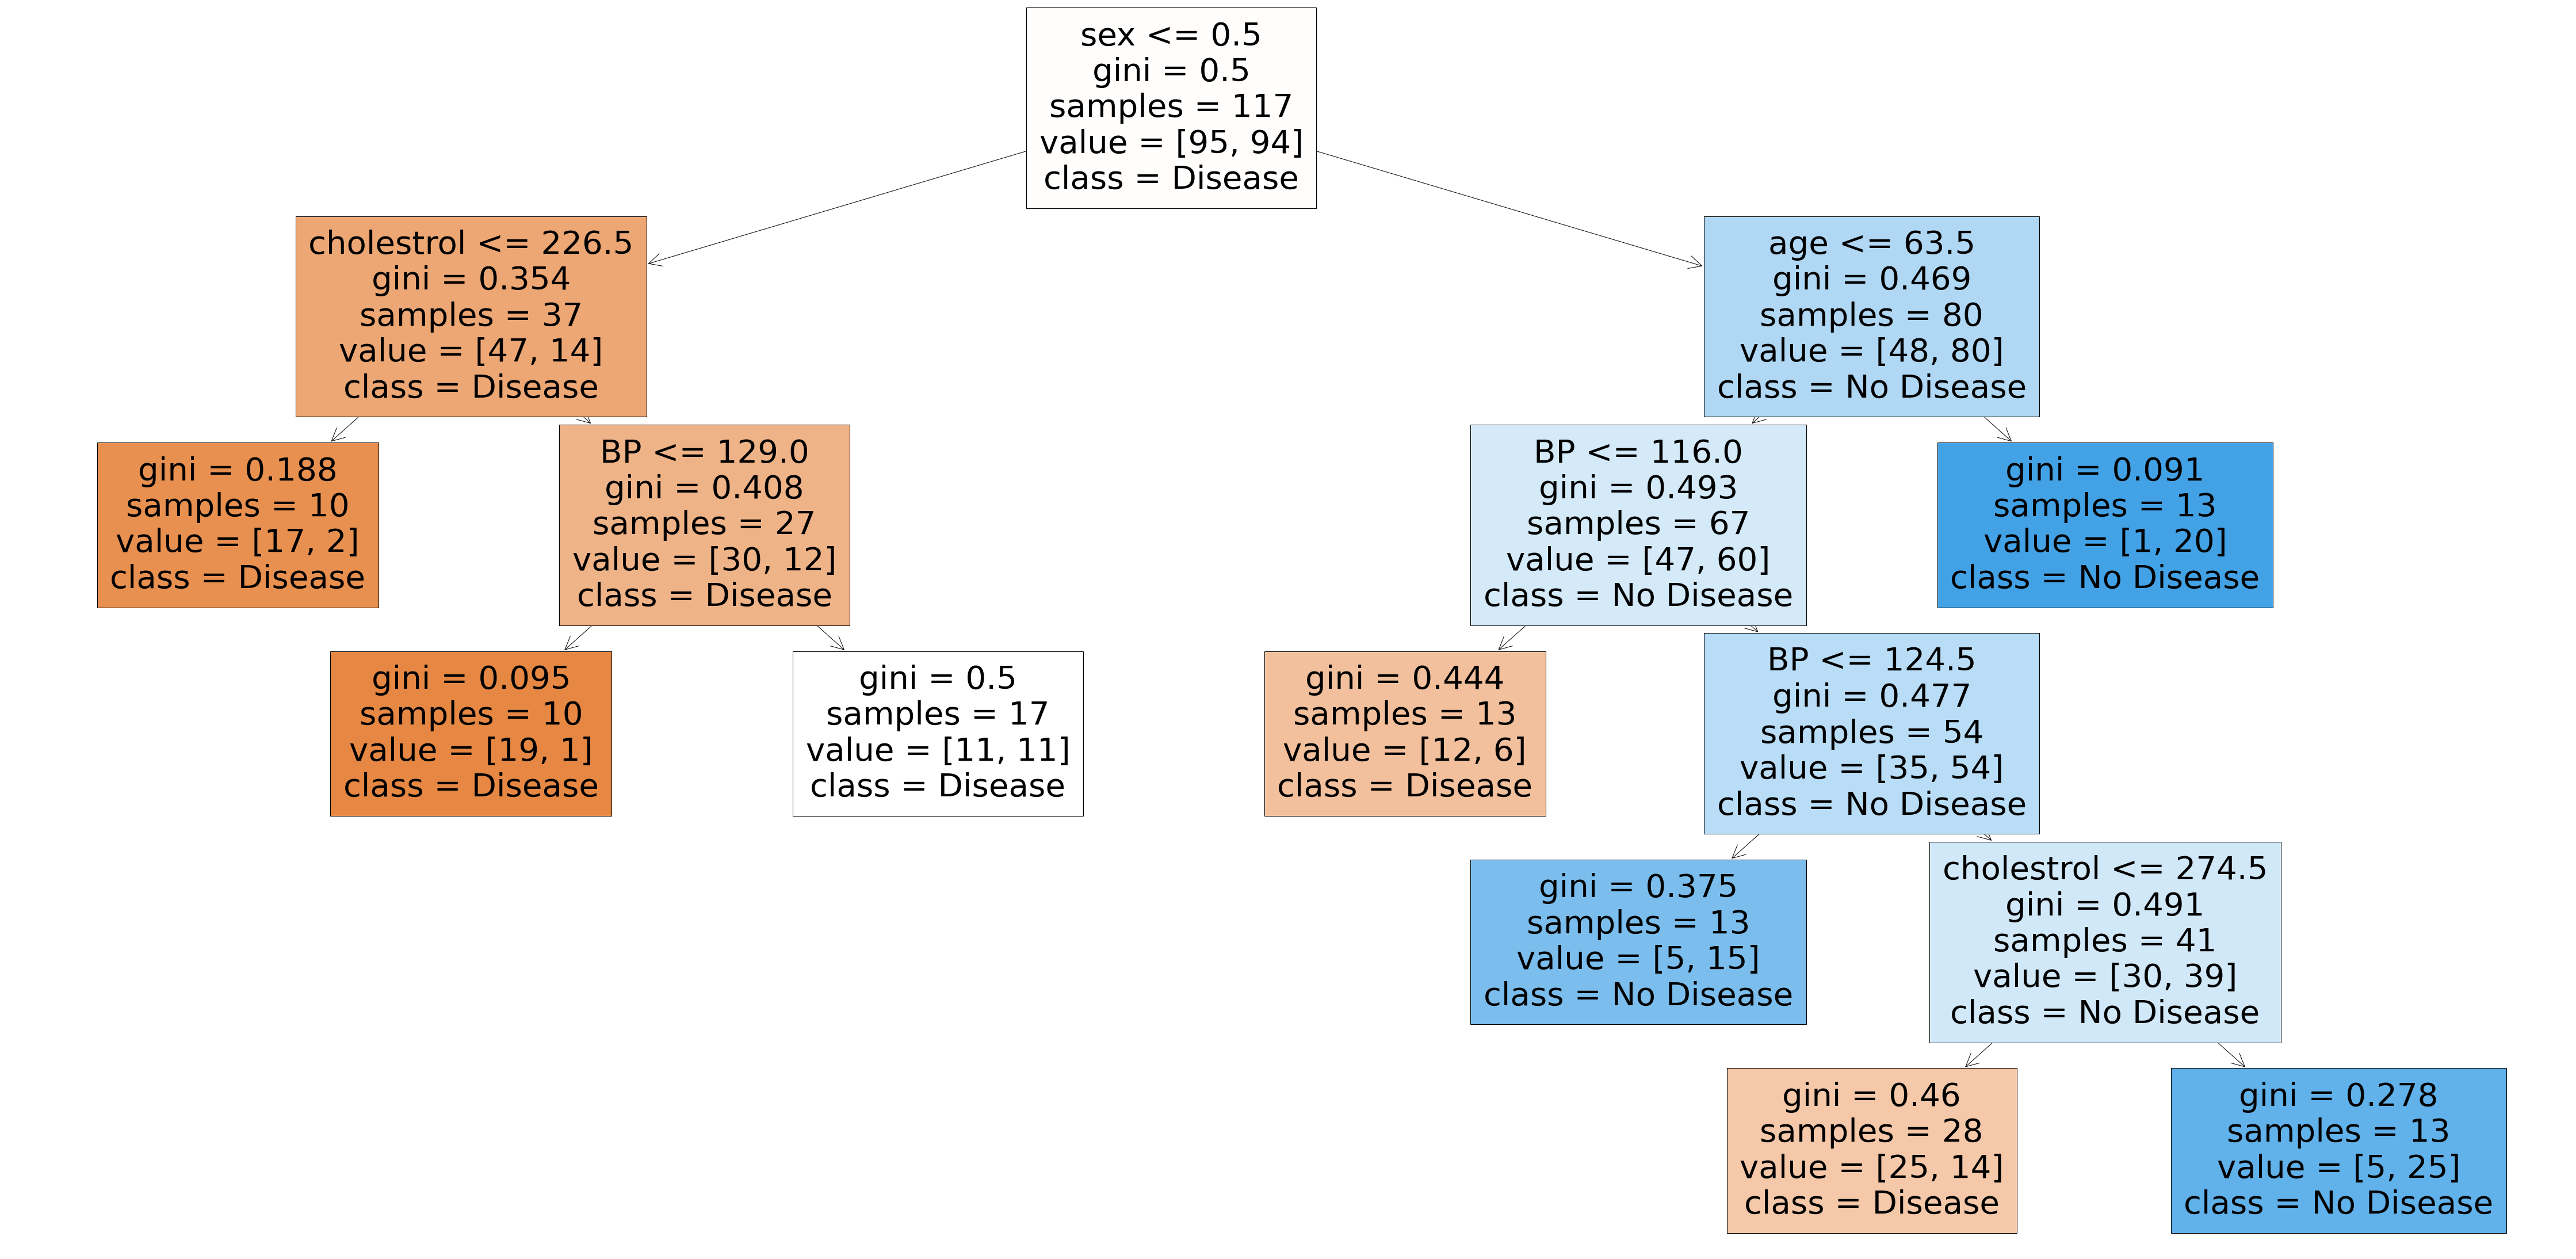

In [ ]:
# Visualizing the decision tree with index 5 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

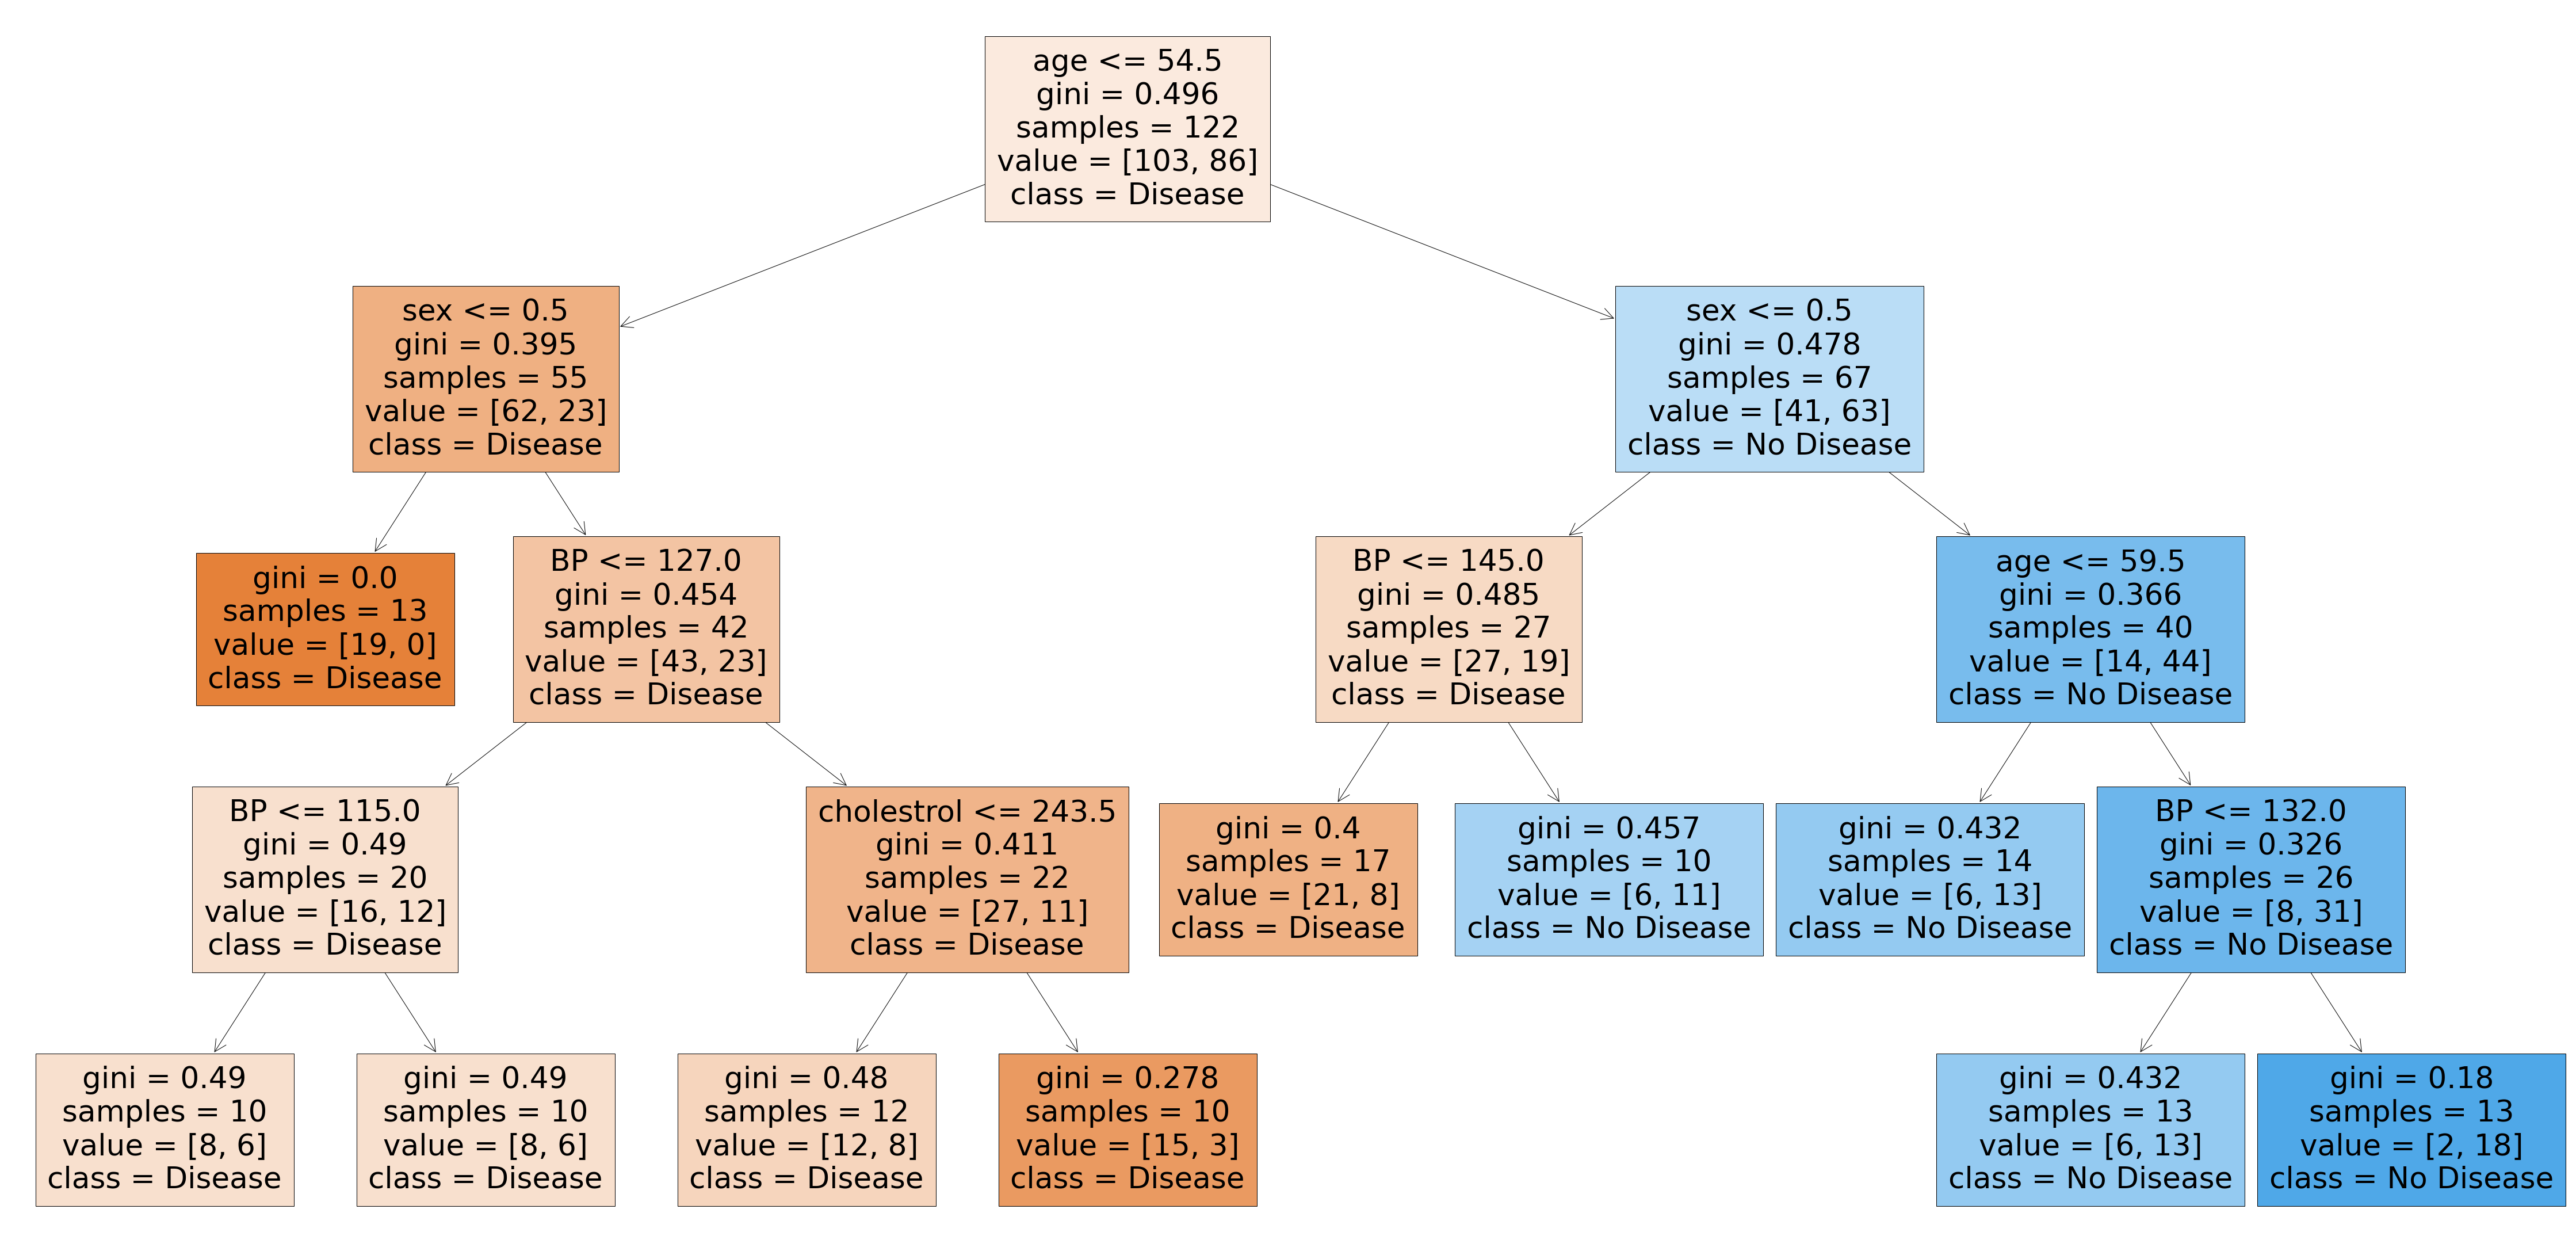

In [ ]:
# Visualizing the decision tree with index 7 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [ ]:
# Finding the feature importance

rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


In [ ]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=4)

In [ ]:
%%time 
model_random = rf_random.fit(X_train, y_train)

CPU times: user 1.23 s, sys: 59.4 ms, total: 1.29 s
Wall time: 1min 4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1098, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 975, i

In [ ]:
model_random.best_params_

{'criterion': 'gini',
 'max_depth': 70,
 'max_features': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [ ]:
model_random.best_score_

0.7041223404255319

In [ ]:
rf_best1 = model_random.best_estimator_
rf_best1

RandomForestClassifier(max_depth=70, max_features=1, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=10, n_jobs=-1,
                       random_state=42)

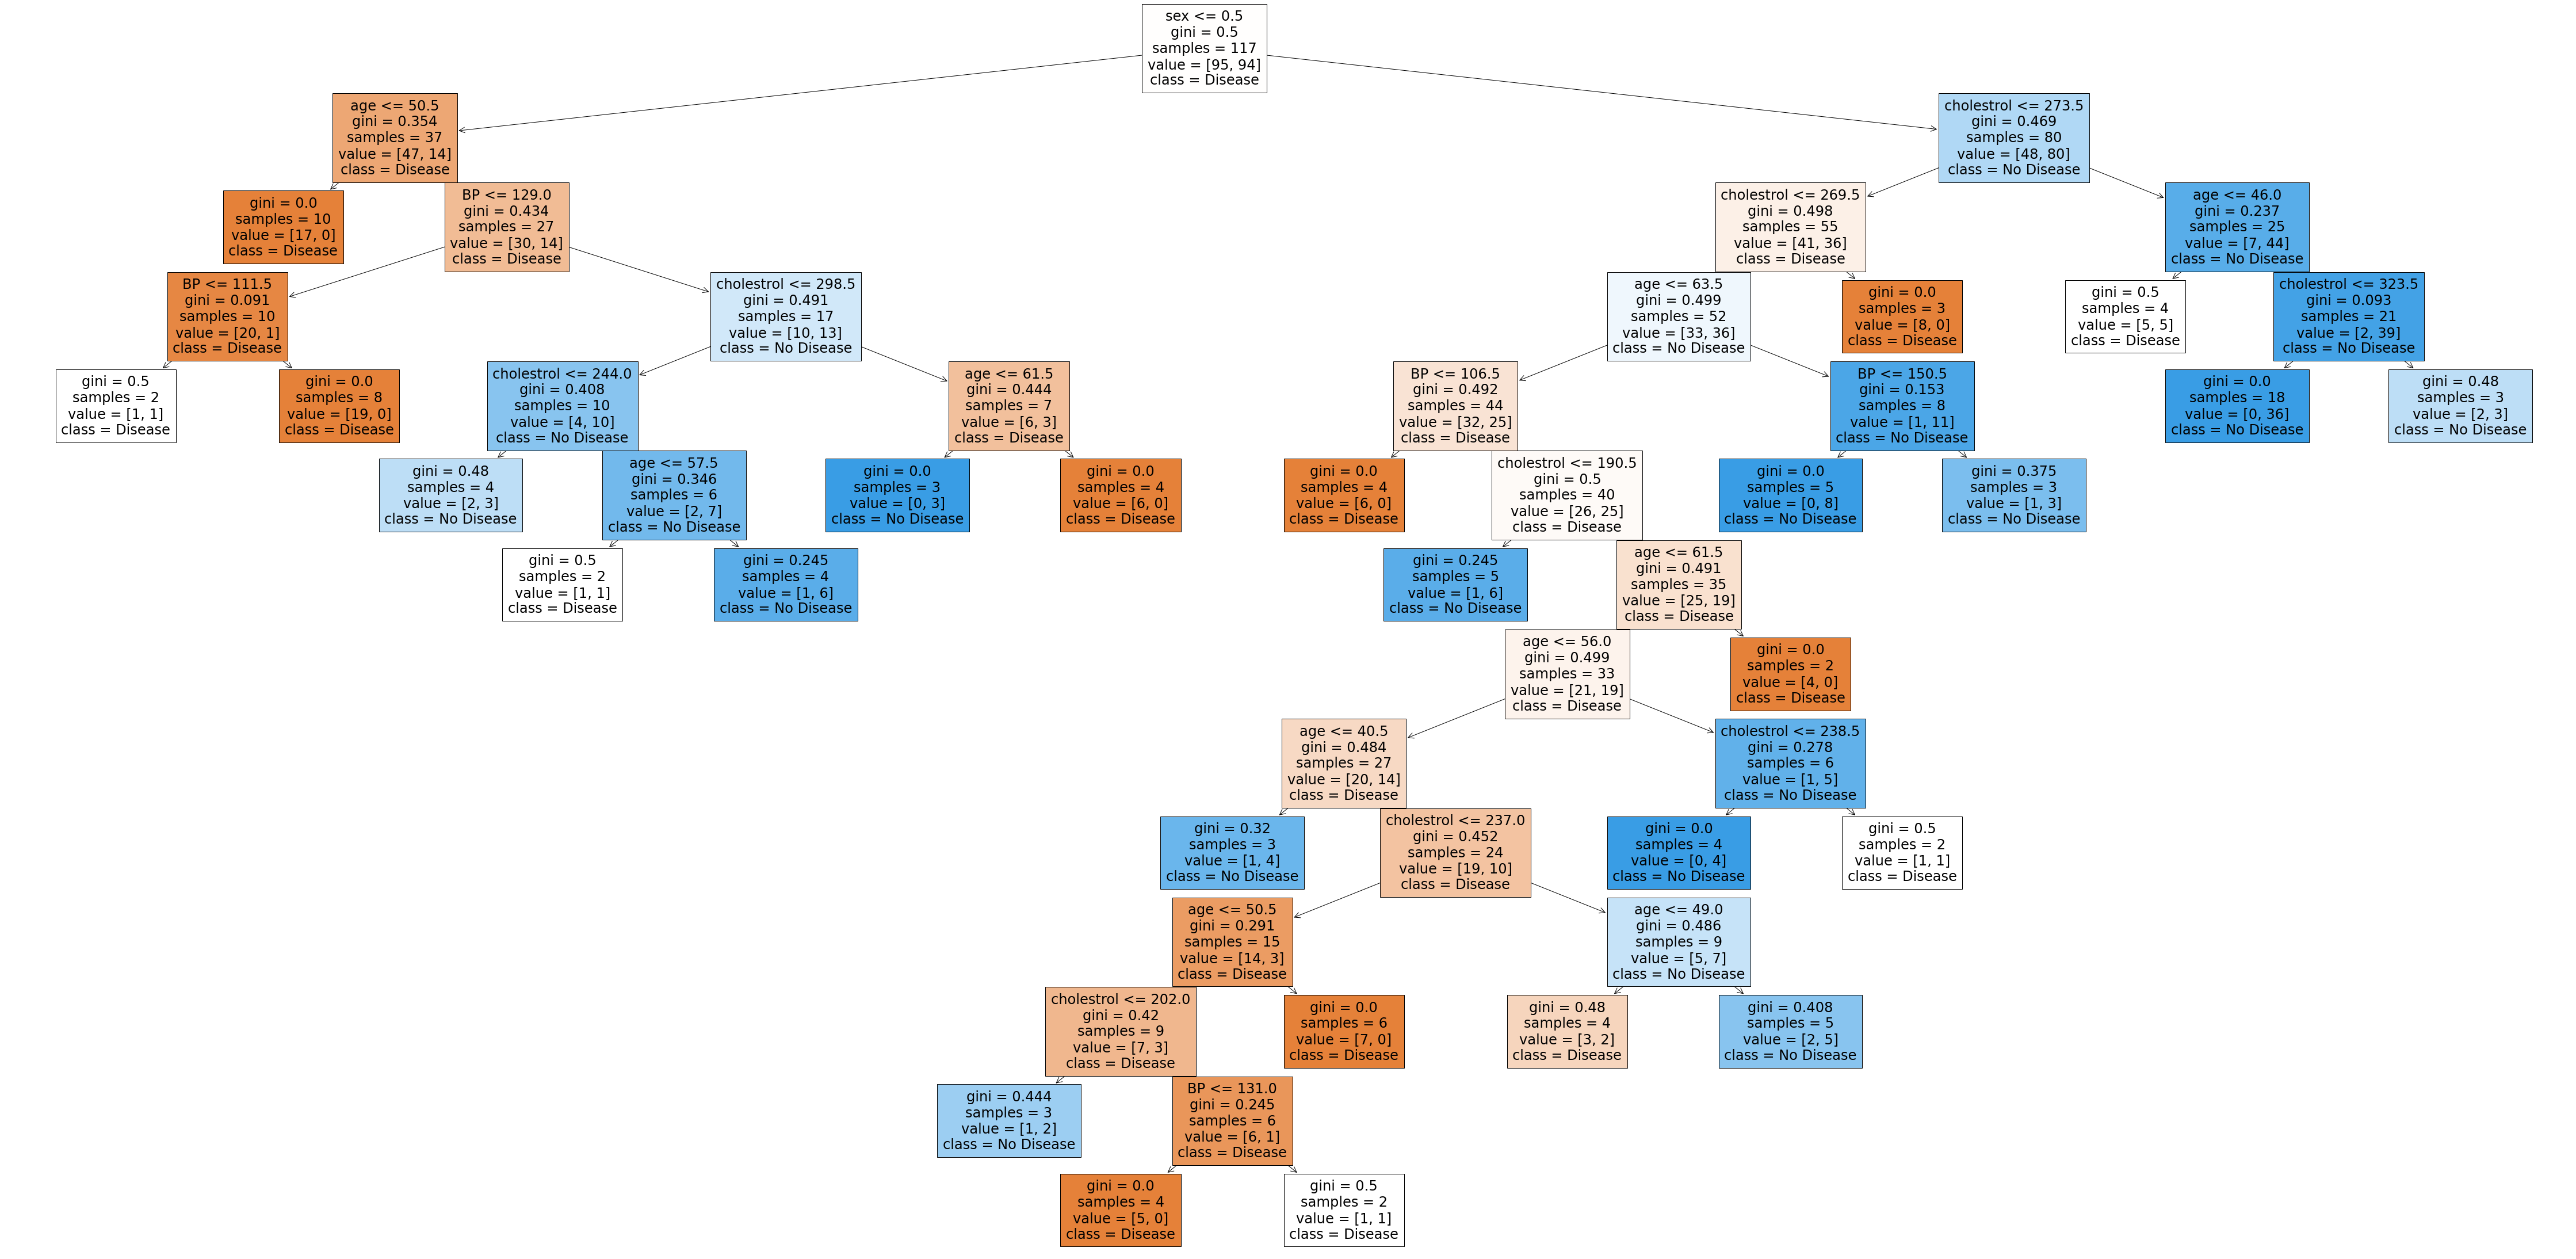

In [ ]:
# Visualizing the decision tree with index 5 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best1.estimators_[9], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [ ]:
# Model (Model Picked through GridSearch) Validation

from sklearn.metrics import confusion_matrix

y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[33, 16],
       [14, 18]])

Text(69.0, 0.5, 'Truth')

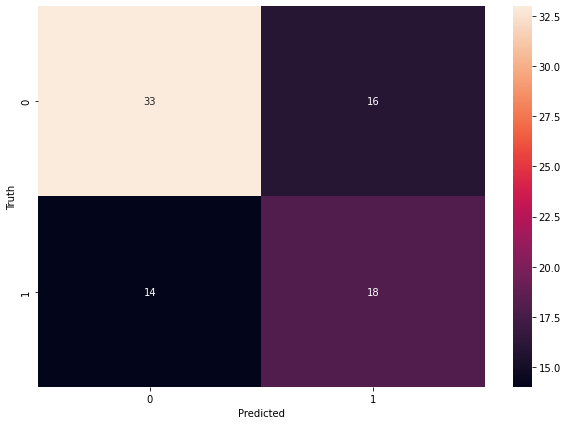

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Model (Model Picked through RandomSearch) Validation

from sklearn.metrics import confusion_matrix

y_pred1 = rf_best1.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[33, 16],
       [14, 18]])

Text(69.0, 0.5, 'Truth')

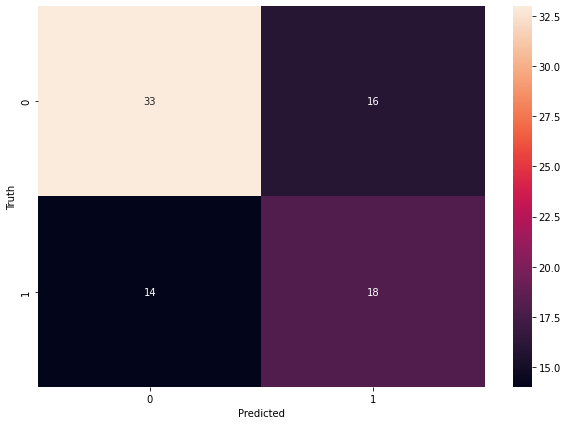

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Classification Report (Model Picked through GridSearch)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69        49
           1       0.53      0.56      0.55        32

    accuracy                           0.63        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.63      0.63      0.63        81



In [ ]:
# Classification Report (Model Picked through RandomSearch)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        49
           1       0.50      0.50      0.50        32

    accuracy                           0.60        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.60      0.60      0.60        81



In [ ]:
# Model (Original Model) Validation

y_pred2 = classifier_rf.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[36, 13],
       [15, 17]])

Text(69.0, 0.5, 'Truth')

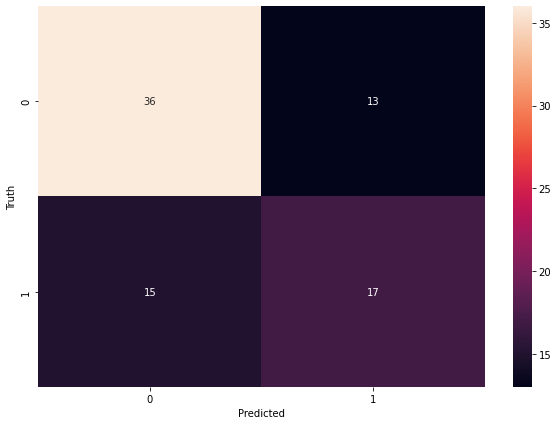

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')